# _Gather 1 Day of Data & Sample For Producing Embeddings_

In [35]:
#!pip list

In [36]:
from google.cloud import bigquery
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [14]:
Path.cwd().parent

PosixPath('/home/jupyter/covid_disinfo_detect/experiments')

In [15]:
def experiments_path():
    return Path.cwd().parent

In [16]:
path = experiments_path()
print(path)

/home/jupyter/covid_disinfo_detect/experiments


In [2]:
client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: covid-disinfo-detect


In [3]:
dataset_ref = client.dataset('twitter_dailies')

In [4]:
tables = client.list_tables('covid-disinfo-detect.twitter_dailies')

In [7]:
#for t in tables:
#    print(t.table_id)

In [6]:
sql = '''
    SELECT *
    FROM `twitter_dailies.2020_05_27`
    WHERE lang='en'
'''

In [8]:
query_job = client.query(
    sql,
    location='US'
)

In [9]:
df = query_job.to_dataframe()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535068 entries, 0 to 535067
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   created_at   535068 non-null  datetime64[ns, UTC]
 1   id_str       535068 non-null  object             
 2   user_id_str  535068 non-null  object             
 3   lang         535068 non-null  object             
 4   full_text    535068 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 20.4+ MB


## _Set created_at as index_

In [18]:
df_edit = df.set_index('created_at')

In [25]:
# check for duplicates
df_edit.duplicated(subset='id_str').sum()

1

In [26]:
fifteen_min = df_edit.resample('15T', label='right', closed='right').count()

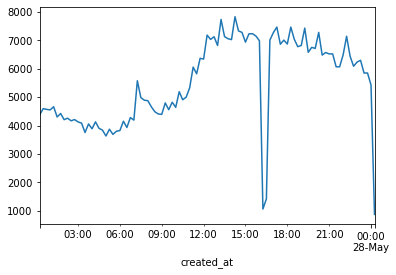

In [27]:
fifteen_min['id_str'].plot()

## _Grab Random Sample of Tweets_

In [51]:
sample = df.sample(
    n=1000,
    random_state=8)

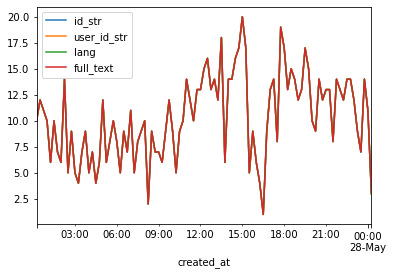

In [52]:
sample.set_index(
    'created_at').resample(
    '15T', label='right', closed='right').count().plot()

In [55]:
sample_edit = sample.sort_values(by='created_at').reset_index(drop=True)

In [58]:
sample_edit.to_json(
    f'{path}/playground_data/sample_data_2020_05_27.json',
    orient='columns'
)